In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest

In [ ]:
df = pd.read_csv('p1_train.csv')
X, Y = df.drop(['class'], axis=1), df['class']

In [ ]:
Y[Y == 'MmMmM'].shape

(544,)

In [ ]:
Y[Y == 'QqQqQ'].shape

(987,)

In [ ]:
scaler = StandardScaler().fit(X)
X = scaler.transform(X)
encoder = LabelEncoder()
Y = encoder.fit_transform(Y)

In [ ]:
from keras import Sequential
from keras.api.layers import Input, Dense
from keras.api.optimizers import SGD
from keras.api.callbacks import EarlyStopping
from keras.api.optimizers.schedules import ExponentialDecay
from keras.api.initializers import Zeros, RandomNormal
from keras.api.regularizers import l1, l2

In [ ]:
model = Sequential()
model.add(Input(shape=(X.shape[-1],)))
model.add(Dense(units=32, activation='relu', kernel_initializer=RandomNormal(0, 1), kernel_regularizer=l1(0.01)))
model.add(Dense(units=1, activation='sigmoid', kernel_initializer=Zeros(), kernel_regularizer=l2(0.001)))
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 32)             │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,057 (4.13 KB)

 Trainable params: 1,057 (4.13 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
lr_schedule = ExponentialDecay(
    initial_learning_rate=0.1,
    decay_steps=1600,
    decay_rate=0.95,
    staircase=False
)
sgd_optimizer = SGD(learning_rate=lr_schedule)
model.compile(optimizer=sgd_optimizer, loss='binary_crossentropy', metrics=['accuracy', 'precision', 'recall'])
early_stop = EarlyStopping(monitor='loss', mode='min', min_delta=0.0001, patience=10, restore_best_weights=True)

In [ ]:
history = model.fit(X, Y, epochs=300, batch_size=16, shuffle=True, class_weight={0:1.5, 1:1}, callbacks=[early_stop])

Epoch 1/300
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6117 - loss: 9.3189 - precision: 0.7182 - recall: 0.6168
Epoch 2/300
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7197 - loss: 7.6146 - precision: 0.8102 - recall: 0.7426
Epoch 3/300
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7300 - loss: 6.7016 - precision: 0.8086 - recall: 0.7645
Epoch 4/300
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7726 - loss: 5.7153 - precision: 0.8356 - recall: 0.8104
Epoch 5/300
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7743 - loss: 4.9783 - precision: 0.8443 - recall: 0.7838
Epoch 6/300
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8321 - loss: 4.2417 - precision: 0.8960 - recall: 0.8410
Epoch 7/300
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8232 - loss: 3.6755 - precision: 0.8732 - recall: 0.8513
Epoch 8/300
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8275 - loss: 3.1633 - precision: 0.8934 - recall: 0.8285
Epoch 9/300
96/96 ━━━━━━

In [ ]:
df_test = pd.read_csv('p1_test_student.csv')
X_test, Y_test = df_test.drop(['class'], axis=1), df_test['class']
X_test = scaler.transform(X_test)
Y_predict = model.predict(X_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [ ]:
Y_test = encoder.transform(Y_test).reshape(-1, 1)
Y_test.shape

(305, 1)

In [ ]:
Y_predict_labels = (Y_predict > 0.5).astype(int)

In [ ]:
(Y_predict_labels == 1).sum(), (Y_predict_labels == 0).sum()

(np.int64(192), np.int64(113))

In [ ]:
(Y_test == 1).sum(), (Y_test == 0).sum()

(np.int64(196), np.int64(109))

In [ ]:
TP = ((Y_predict_labels == 1) & (Y_test == 1)).sum()
TF = ((Y_predict_labels == 0) & (Y_test == 0)).sum()
FP = ((Y_predict_labels == 1) & (Y_test != 1)).sum()
FN = ((Y_predict_labels == 0) & (Y_test == 1)).sum()
accuracy = (Y_predict_labels == Y_test).sum() / Y_test.shape[0]
precision = TP / (TP + FP)
recall =  TP / (TP + FN)
f1_score = 2 * precision * recall / (precision + recall)
print(f"accuracy: {accuracy}, precision: {precision}, recall: {recall}, f1_score: {f1_score}")

accuracy: 0.8819672131147541, precision: 0.9166666666666666, recall: 0.8979591836734694, f1_score: 0.9072164948453607


accuracy: 0.8721311475409836,
precision: 0.8905472636815921,
recall: 0.9132653061224489,
f1_score: 0.9017632241813602

In [ ]:
FP, FN

(np.int64(16), np.int64(20))

In [ ]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'precision', 'recall'])

In [ ]:
from matplotlib import pyplot as plt

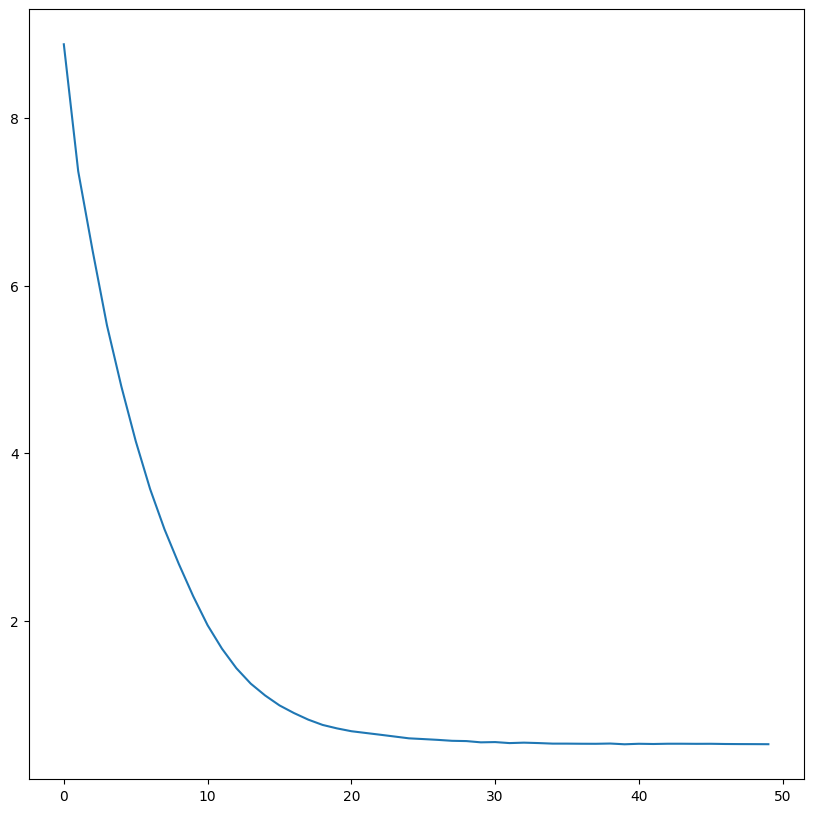

In [ ]:
fig = plt.figure(figsize=(10, 10))
plt.plot([x for x in range(len(history.history['loss']))], history.history['loss'])

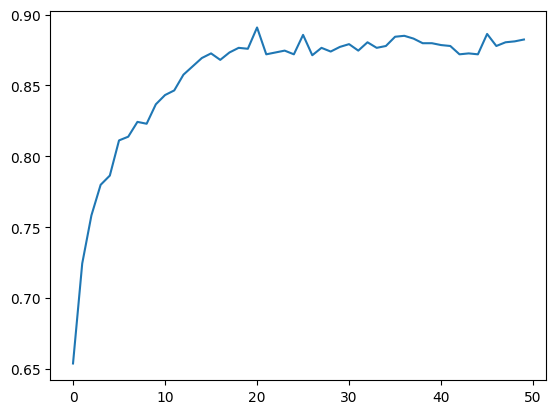

In [ ]:
plt.plot([x for x in range(len(history.history['accuracy']))], history.history['accuracy'])

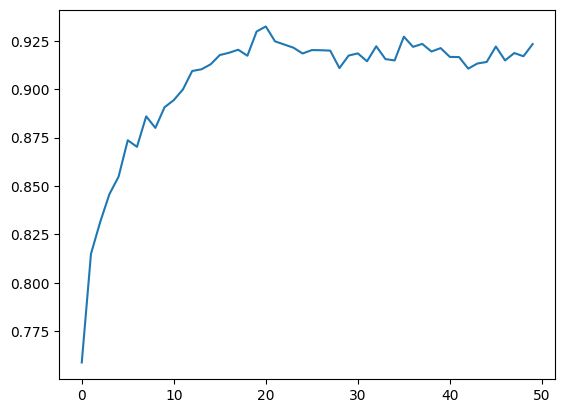

In [ ]:
plt.plot([x for x in range(len(history.history['precision']))], history.history['precision'])

In [ ]:
encoder.classes_

array(['MmMmM', 'QqQqQ'], dtype=object)

In [ ]:
encoder.transform

<bound method LabelEncoder.transform of LabelEncoder()>